Importing the necessary package 

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import os
from factor_analyzer import Rotator
import seaborn as sns
import json
import geojson

# Data Cleaning

Reading the data from the .csv file 

In [55]:
df = pd.read_csv('Variable in DAs.csv', encoding='latin-1', low_memory=False)
df

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
0              2021  2021S051259150307      59150307  Dissemination area   
1              2021  2021S051259150307      59150307  Dissemination area   
2              2021  2021S051259150307      59150307  Dissemination area   
3              2021  2021S051259150307      59150307  Dissemination area   
4              2021  2021S051259150307      59150307  Dissemination area   
...             ...                ...           ...                 ...   
471883         2021  2021S051259154196      59154196  Dissemination area   
471884         2021  2021S051259154196      59154196  Dissemination area   
471885         2021  2021S051259154196      59154196  Dissemination area   
471886         2021  2021S051259154196      59154196  Dissemination area   
471887         2021  2021S051259154196      59154196  Dissemination area   

        GEO_NAME  CHARACTERISTIC_ID  \
0       59150307                126   
1       59150307                127   
2       59150307                128   
3       59150307                129   
4       59150307                130   
...          ...                ...   
471883  59154196               2619   
471884  59154196               2620   
471885  59154196               2621   
471886  59154196               2622   
471887  59154196               2623   

                                      CHARACTERISTIC_NAME  \
0                                                     NaN   
1         Number of total income recipients aged 15 ye...   
2           Average total income in 2020 among recipie...   
3         Number of after-tax income recipients aged 1...   
4           Average after-tax income in 2020 among rec...   
...                                                   ...   
471883                       Between 6 a.m. and 6:59 a.m.   
471884                       Between 7 a.m. and 7:59 a.m.   
471885                       Between 8 a.m. and 8:59 a.m.   
471886                      Between 9 a.m. and 11:59 a.m.   
471887                      Between 12 p.m. and 4:59 a.m.   

        CHARACTERISTIC_NOTE  C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  \
0                      11.0           590.0          315.0            275.0   
1                       NaN           555.0          295.0            265.0   
2                       NaN         63400.0        77000.0          48400.0   
3                       NaN           555.0          295.0            265.0   
4                       NaN         51600.0        60400.0          41600.0   
...                     ...             ...            ...              ...   
471883                  NaN            50.0           20.0             25.0   
471884                  NaN           110.0           70.0             40.0   
471885                  NaN            50.0           15.0             30.0   
471886                  NaN            85.0           40.0             45.0   
471887                  NaN            80.0           45.0             30.0   

        C10_RATE_TOTAL  C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  
0                100.0          100.0            100.0         NaN  
1                 94.1           93.7             96.4         NaN  
2              63400.0        77000.0          48400.0         NaN  
3                 94.1           93.7             96.4         NaN  
4              51600.0        60400.0          41600.0         NaN  
...                ...            ...              ...         ...  
471883            13.5            9.8             14.7         NaN  
471884            29.7           34.1             23.5         NaN  
471885            13.5            7.3             17.6         NaN  
471886            23.0           19.5             26.5         NaN  
471887            21.6           22.0             17.6         NaN  

[471888 rows x 15 columns]

Selecting only specific characteristics 

In [6]:
selected_variables = ['1539', '1540', '1462', '1463', '1464', '1999', '2001', '1993', 
                      '1416', '1453', '2620', '1827', '1757', '1771', '1705', '1713', 
                      '1684', '1403', '1082', '252', '1467', '151', '1488',
                      '128', '2226', '2224', '2225', '2227', '2261', '1441', '1442', 
                      '1443', '1444', '2607', '1976', '1433', '1451', '2223','1715']
selected_variables = list(map(int, selected_variables))
filtered_df = df[df['CHARACTERISTIC_ID'].isin(selected_variables)]
filtered_df

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
2              2021  2021S051259150307      59150307  Dissemination area   
25             2021  2021S051259150307      59150307  Dissemination area   
55             2021  2021S051259150307      59150307  Dissemination area   
82             2021  2021S051259150307      59150307  Dissemination area   
104            2021  2021S051259150307      59150307  Dissemination area   
...             ...                ...           ...                 ...   
471794         2021  2021S051259154196      59154196  Dissemination area   
471795         2021  2021S051259154196      59154196  Dissemination area   
471827         2021  2021S051259154196      59154196  Dissemination area   
471873         2021  2021S051259154196      59154196  Dissemination area   
471884         2021  2021S051259154196      59154196  Dissemination area   

        GEO_NAME  CHARACTERISTIC_ID  \
2       59150307                128   
25      59150307                151   
55      59150307                252   
82      59150307               1082   
104     59150307               1403   
...          ...                ...   
471794  59154196               2226   
471795  59154196               2227   
471827  59154196               2261   
471873  59154196               2607   
471884  59154196               2620   

                                      CHARACTERISTIC_NAME  \
2           Average total income in 2020 among recipie...   
25                               Government transfers (%)   
55          Average total income of household in 2020 ($)   
82                                 Non-official languages   
104                                   Indigenous identity   
...                                                   ...   
471794                                         Unemployed   
471795                            Not in the labour force   
471827                                     All industries   
471873                                     Public transit   
471884                       Between 7 a.m. and 7:59 a.m.   

        CHARACTERISTIC_NOTE  C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  \
2                       NaN         63400.0        77000.0          48400.0   
25                     20.0            12.7            9.2             19.2   
55                      NaN        133000.0            NaN              NaN   
82                      NaN           250.0          120.0            135.0   
104                    45.0            10.0            0.0             10.0   
...                     ...             ...            ...              ...   
471794                  NaN            55.0           20.0             30.0   
471795                  NaN           225.0           95.0            135.0   
471827                191.0           485.0          270.0            215.0   
471873                  NaN           120.0           45.0             75.0   
471884                  NaN           110.0           70.0             40.0   

        C10_RATE_TOTAL  C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  
2              63400.0        77000.0          48400.0         NaN  
25                12.7            9.2             19.2         NaN  
55            133000.0            NaN              NaN         NaN  
82                35.0           32.9             39.1         NaN  
104                1.4            0.0              2.9         NaN  
...                ...            ...              ...         ...  
471794             NaN            NaN              NaN         NaN  
471795             NaN            NaN              NaN         NaN  
471827            96.0          100.0             93.5         NaN  
471873            32.4           22.0             44.1         NaN  
471884            29.7           34.1             23.5         NaN  

[33636 rows x 15 columns]

As the last 'GEO' was repeated twice, we will drop the records that have been duplicated in the dataframe

In [7]:
filtered_df = filtered_df.drop_duplicates()

For our pre processing step we only need to consider the following characteristic ids:2223, 2224, 2225, 2226, 2227, 128, 252, 1488 
    

In [8]:
# Focusing on the data that is needed for the computation 
Considered_df = filtered_df[filtered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]
Considered_df

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
2              2021  2021S051259150307      59150307  Dissemination area   
55             2021  2021S051259150307      59150307  Dissemination area   
174            2021  2021S051259150307      59150307  Dissemination area   
396            2021  2021S051259150307      59150307  Dissemination area   
397            2021  2021S051259150307      59150307  Dissemination area   
...             ...                ...           ...                 ...   
471374         2021  2021S051259154196      59154196  Dissemination area   
471375         2021  2021S051259154196      59154196  Dissemination area   
471376         2021  2021S051259154196      59154196  Dissemination area   
471377         2021  2021S051259154196      59154196  Dissemination area   
471378         2021  2021S051259154196      59154196  Dissemination area   

        GEO_NAME  CHARACTERISTIC_ID  \
2       59150307                128   
55      59150307                252   
174     59150307               1488   
396     59150307               2223   
397     59150307               2224   
...          ...                ...   
471374  59154196               2223   
471375  59154196               2224   
471376  59154196               2225   
471377  59154196               2226   
471378  59154196               2227   

                                      CHARACTERISTIC_NAME  \
2           Average total income in 2020 among recipie...   
55          Average total income of household in 2020 ($)   
174                         Median value of dwellings ($)   
396     Total - Population aged 15 years and over by l...   
397                                   In the labour force   
...                                                   ...   
471374  Total - Population aged 15 years and over by l...   
471375                                In the labour force   
471376                                           Employed   
471377                                         Unemployed   
471378                            Not in the labour force   

        CHARACTERISTIC_NOTE  C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  \
2                       NaN         63400.0        77000.0          48400.0   
55                      NaN        133000.0            NaN              NaN   
174                    66.0       1700000.0            NaN              NaN   
396                   184.0           590.0          315.0            275.0   
397                     NaN           405.0          220.0            185.0   
...                     ...             ...            ...              ...   
471374                184.0           730.0          370.0            360.0   
471375                  NaN           505.0          275.0            225.0   
471376                  NaN           450.0          255.0            200.0   
471377                  NaN            55.0           20.0             30.0   
471378                  NaN           225.0           95.0            135.0   

        C10_RATE_TOTAL  C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  
2              63400.0        77000.0          48400.0         NaN  
55            133000.0            NaN              NaN         NaN  
174          1700000.0            NaN              NaN         NaN  
396                NaN            NaN              NaN         NaN  
397                NaN            NaN              NaN         NaN  
...                ...            ...              ...         ...  
471374             NaN            NaN              NaN         NaN  
471375             NaN            NaN              NaN         NaN  
471376             NaN            NaN              NaN         NaN  
471377             NaN            NaN              NaN         NaN  
471378             NaN            NaN              NaN         NaN  

[8053 rows x 15 columns]

# Computation for labor rates

We will compute the rates based on the subset of the data. At each time we would filter the data for each specific 'GEO_NAME' and then we would compute the rates based on the data for that 'GEO_NAME'. 

In this code we would start from an empty dataframe 'Filled_df' and at each time we would add the data computed for each 'GEO_NAME' to this dataframe at the end of each cycle. 

__NOTE:__ in our computation, we would also remove the characteristic that was not needed '2223' from the data of each 'GEO_NAME' and then add the data to our global dataframe. 

In [9]:
# The dataframe that would contain the filled values for the rates
Filled_df = pd.DataFrame()

# We will compute the rates for each 'GEO_NAME' one by one 
for geo in Considered_df['GEO_NAME'].unique(): 
    
    # Take the useful data for the computation of the rate of this 'GEO_NAME'
    One_sample = Considered_df[(Considered_df['GEO_NAME'] == geo) & 
                               Considered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227])].copy()
    
    # Take the values of the total population 
    Denomenator = One_sample[One_sample['CHARACTERISTIC_ID'] == 2223][['C1_COUNT_TOTAL', 'C2_COUNT_MEN+', 'C3_COUNT_WOMEN+']]
    
    # Take the values of each type of the population 
    Numenator = One_sample[One_sample['CHARACTERISTIC_ID']!= 2223][['C1_COUNT_TOTAL', 'C2_COUNT_MEN+', 'C3_COUNT_WOMEN+']]
    
    # Computing the rates and put them in the corresponding cell
    One_sample[['C10_RATE_TOTAL', 'C11_RATE_MEN+', 'C12_RATE_WOMEN+']] = Numenator.divide(np.array(Denomenator)) * 100
    
    # Removing the chracteristic '2223' that is not needed for us which is the total population 
    One_sample = One_sample[One_sample['CHARACTERISTIC_ID'] != 2223]
    
    # Adding the new data for this 'GEO_NAME' to the temporary dataframe that we created
    Filled_df = pd.concat([Filled_df, One_sample])

# Scaling some characteristics 

We will scale the values for these characteristics (128, 252, 1488) and then concat the values to the previously filled data frame. 

In [10]:
# The characteristics that should be scaled
Need_to_scale = [128, 252, 1488]

# For each characteristic
for character_id in Need_to_scale: 
    
    # The data regarding this characteristic 
    temp_df = Considered_df[Considered_df['CHARACTERISTIC_ID'] == character_id].copy()
    
    # Taking the values of this characteristic
    data = np.array(temp_df['C1_COUNT_TOTAL'])
    
    # Creating a scaler
    scaler = MinMaxScaler((0, 100))
    
    # Getting the scaled data
    scaled_data = 100 - scaler.fit_transform(data.reshape(-1, 1))
    
    # Put the scaled value in the right column 
    temp_df['C10_RATE_TOTAL'] = scaled_data
    
    # Adding this subset of data to the datframe that we had before
    Filled_df = pd.concat([Filled_df, temp_df])

After the computations, we would merge the data that was considered and not considered for our computations, in order to get to the initial dataframe (filtered_df), and then sort the values based on the value of the 'GEO_NAME' and the 'CHARACTERISTIC_ID' and resetting the index of the data. 

In [11]:
# The data that has not been considered in the computation
Not_considered_df = filtered_df[~filtered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])].copy()

# Merging the considered and not considered data for the report 
# and sorting the data based on the 'GEO_NAME' and 'CHARACTERISTIC_ID'
Whole_df = pd.concat([Filled_df, Not_considered_df]).sort_values(['GEO_NAME','CHARACTERISTIC_ID']).reset_index(drop = True)

Taking a look at the final resulf of our data. 

In [12]:
Whole_df

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
0             2021  2021S051259150307      59150307  Dissemination area   
1             2021  2021S051259150307      59150307  Dissemination area   
2             2021  2021S051259150307      59150307  Dissemination area   
3             2021  2021S051259150307      59150307  Dissemination area   
4             2021  2021S051259150307      59150307  Dissemination area   
...            ...                ...           ...                 ...   
32576         2021  2021S051259154196      59154196  Dissemination area   
32577         2021  2021S051259154196      59154196  Dissemination area   
32578         2021  2021S051259154196      59154196  Dissemination area   
32579         2021  2021S051259154196      59154196  Dissemination area   
32580         2021  2021S051259154196      59154196  Dissemination area   

       GEO_NAME  CHARACTERISTIC_ID  \
0      59150307                128   
1      59150307                151   
2      59150307                252   
3      59150307               1082   
4      59150307               1403   
...         ...                ...   
32576  59154196               2226   
32577  59154196               2227   
32578  59154196               2261   
32579  59154196               2607   
32580  59154196               2620   

                                     CHARACTERISTIC_NAME  CHARACTERISTIC_NOTE  \
0          Average total income in 2020 among recipie...                  NaN   
1                               Government transfers (%)                 20.0   
2          Average total income of household in 2020 ($)                  NaN   
3                                 Non-official languages                  NaN   
4                                    Indigenous identity                 45.0   
...                                                  ...                  ...   
32576                                         Unemployed                  NaN   
32577                            Not in the labour force                  NaN   
32578                                     All industries                191.0   
32579                                     Public transit                  NaN   
32580                       Between 7 a.m. and 7:59 a.m.                  NaN   

       C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  C10_RATE_TOTAL  \
0             63400.0        77000.0          48400.0       92.436798   
1                12.7            9.2             19.2       12.700000   
2            133000.0            NaN              NaN       89.469437   
3               250.0          120.0            135.0       35.000000   
4                10.0            0.0             10.0        1.400000   
...               ...            ...              ...             ...   
32576            55.0           20.0             30.0        7.534247   
32577           225.0           95.0            135.0       30.821918   
32578           485.0          270.0            215.0       96.000000   
32579           120.0           45.0             75.0       32.400000   
32580           110.0           70.0             40.0       29.700000   

       C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  
0       77000.000000     48400.000000         NaN  
1           9.200000        19.200000         NaN  
2                NaN              NaN         NaN  
3          32.900000        39.100000         NaN  
4           0.000000         2.900000         NaN  
...              ...              ...         ...  
32576       5.405405         8.333333         NaN  
32577      25.675676        37.500000         NaN  
32578     100.000000        93.500000         NaN  
32579      22.000000        44.100000         NaN  
32580      34.100000        23.500000         NaN  

[32581 rows x 15 columns]

Taking a look at the final computation that was done for each 'GEO_NAME' to verify the computation of the rates. 

In [13]:
Whole_df[Whole_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
0             2021  2021S051259150307      59150307  Dissemination area   
2             2021  2021S051259150307      59150307  Dissemination area   
17            2021  2021S051259150307      59150307  Dissemination area   
27            2021  2021S051259150307      59150307  Dissemination area   
28            2021  2021S051259150307      59150307  Dissemination area   
...            ...                ...           ...                 ...   
32564         2021  2021S051259154196      59154196  Dissemination area   
32574         2021  2021S051259154196      59154196  Dissemination area   
32575         2021  2021S051259154196      59154196  Dissemination area   
32576         2021  2021S051259154196      59154196  Dissemination area   
32577         2021  2021S051259154196      59154196  Dissemination area   

       GEO_NAME  CHARACTERISTIC_ID  \
0      59150307                128   
2      59150307                252   
17     59150307               1488   
27     59150307               2224   
28     59150307               2225   
...         ...                ...   
32564  59154196               1488   
32574  59154196               2224   
32575  59154196               2225   
32576  59154196               2226   
32577  59154196               2227   

                                     CHARACTERISTIC_NAME  CHARACTERISTIC_NOTE  \
0          Average total income in 2020 among recipie...                  NaN   
2          Average total income of household in 2020 ($)                  NaN   
17                         Median value of dwellings ($)                 66.0   
27                                   In the labour force                  NaN   
28                                              Employed                  NaN   
...                                                  ...                  ...   
32564                      Median value of dwellings ($)                 66.0   
32574                                In the labour force                  NaN   
32575                                           Employed                  NaN   
32576                                         Unemployed                  NaN   
32577                            Not in the labour force                  NaN   

       C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  C10_RATE_TOTAL  \
0             63400.0        77000.0          48400.0       92.436798   
2            133000.0            NaN              NaN       89.469437   
17          1700000.0            NaN              NaN       82.547170   
27              405.0          220.0            185.0       68.644068   
28              360.0          195.0            170.0       61.016949   
...               ...            ...              ...             ...   
32564       2000000.0            NaN              NaN       78.616352   
32574           505.0          275.0            225.0       69.178082   
32575           450.0          255.0            200.0       61.643836   
32576            55.0           20.0             30.0        7.534247   
32577           225.0           95.0            135.0       30.821918   

       C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  
0       77000.000000     48400.000000         NaN  
2                NaN              NaN         NaN  
17               NaN              NaN         NaN  
27         69.841270        67.272727         NaN  
28         61.904762        61.818182         NaN  
...              ...              ...         ...  
32564            NaN              NaN         NaN  
32574      74.324324        62.500000         NaN  
32575      68.918919        55.555556         NaN  
32576       5.405405         8.333333         NaN  
32577      25.675676        37.500000         NaN  

[7030 rows x 15 columns]

## Final value 

Here we will only keep the necessary value that we want from each characteristic. We will add another column to put the final value that we want from each characteristic. 

For each characteristic except the followings we need the value of 'C10_RATE_TOTAL'

    Unemployed: 'C10_RATE_TOTAL'

    Employed: 'C12_RATE_WOMEN+'

    Not in the laybor force: 'C11_RATE_MEN'

    In the laybor force: 'C12_RATE_WOMEN+'

### Function final value 

We will write another function that based on the type of the characteristic, would take the correct final value of that characteristic. 

In [14]:
# This given one row, would output a specific value 
def final_value(x): 
    
    # If the characteristic id is 2225 or 2224 we need the rate for women 
    if x['CHARACTERISTIC_ID'] in [2225, 2224]: 
        return x['C12_RATE_WOMEN+']
    
    # If the characteristic id is 2227 we need the rate of the men
    elif x['CHARACTERISTIC_ID'] == 2227: 
        return x['C11_RATE_MEN+']

    # In all of other cases we need the value of the rate total 
    else: 
        return x['C10_RATE_TOTAL']
    
# Forming the final value 
Whole_df['Final value'] = Whole_df.apply(final_value, axis = 1)

Taking a look at the output for the final value and verify the final values. 

In [15]:
Whole_df[Whole_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]

CENSUS_YEAR              DGUID  ALT_GEO_CODE           GEO_LEVEL  \
0             2021  2021S051259150307      59150307  Dissemination area   
2             2021  2021S051259150307      59150307  Dissemination area   
17            2021  2021S051259150307      59150307  Dissemination area   
27            2021  2021S051259150307      59150307  Dissemination area   
28            2021  2021S051259150307      59150307  Dissemination area   
...            ...                ...           ...                 ...   
32564         2021  2021S051259154196      59154196  Dissemination area   
32574         2021  2021S051259154196      59154196  Dissemination area   
32575         2021  2021S051259154196      59154196  Dissemination area   
32576         2021  2021S051259154196      59154196  Dissemination area   
32577         2021  2021S051259154196      59154196  Dissemination area   

       GEO_NAME  CHARACTERISTIC_ID  \
0      59150307                128   
2      59150307                252   
17     59150307               1488   
27     59150307               2224   
28     59150307               2225   
...         ...                ...   
32564  59154196               1488   
32574  59154196               2224   
32575  59154196               2225   
32576  59154196               2226   
32577  59154196               2227   

                                     CHARACTERISTIC_NAME  CHARACTERISTIC_NOTE  \
0          Average total income in 2020 among recipie...                  NaN   
2          Average total income of household in 2020 ($)                  NaN   
17                         Median value of dwellings ($)                 66.0   
27                                   In the labour force                  NaN   
28                                              Employed                  NaN   
...                                                  ...                  ...   
32564                      Median value of dwellings ($)                 66.0   
32574                                In the labour force                  NaN   
32575                                           Employed                  NaN   
32576                                         Unemployed                  NaN   
32577                            Not in the labour force                  NaN   

       C1_COUNT_TOTAL  C2_COUNT_MEN+  C3_COUNT_WOMEN+  C10_RATE_TOTAL  \
0             63400.0        77000.0          48400.0       92.436798   
2            133000.0            NaN              NaN       89.469437   
17          1700000.0            NaN              NaN       82.547170   
27              405.0          220.0            185.0       68.644068   
28              360.0          195.0            170.0       61.016949   
...               ...            ...              ...             ...   
32564       2000000.0            NaN              NaN       78.616352   
32574           505.0          275.0            225.0       69.178082   
32575           450.0          255.0            200.0       61.643836   
32576            55.0           20.0             30.0        7.534247   
32577           225.0           95.0            135.0       30.821918   

       C11_RATE_MEN+  C12_RATE_WOMEN+ Unnamed: 14  Final value  
0       77000.000000     48400.000000         NaN    92.436798  
2                NaN              NaN         NaN    89.469437  
17               NaN              NaN         NaN    82.547170  
27         69.841270        67.272727         NaN    67.272727  
28         61.904762        61.818182         NaN    61.818182  
...              ...              ...         ...          ...  
32564            NaN              NaN         NaN    78.616352  
32574      74.324324        62.500000         NaN    62.500000  
32575      68.918919        55.555556         NaN    55.555556  
32576       5.405405         8.333333         NaN     7.534247  
32577      25.675676        37.500000         NaN    25.675676  

[7030 rows x 16 co

Here we will drop the meaningless column that we had. 



In [16]:
Whole_df.drop(['Unnamed: 14'], axis = 1, inplace = True)

In [17]:
fountains = pd.read_csv('Fountains.csv', encoding='latin-1', low_memory=False)
fountains

GEO_NAME  Fountains
0      59150307.0          0
1      59150307.0          0
2      59150307.0          0
3      59150307.0          0
4      59150307.0          0
...           ...        ...
32527  59154196.0          0
32528  59154196.0          0
32529  59154196.0          0
32530  59154196.0          0
32531  59154196.0          0

[32532 rows x 2 columns]

In [18]:
# Reading the CSV file
fountains = pd.read_csv('Fountains.csv', encoding='latin-1', low_memory=False)

# Removing duplicate rows based on 'GEO_NAME' column
fountains = fountains.drop_duplicates(subset=['GEO_NAME'], keep='first')

# Extracting the 'GEO_NAME' column
geo_names = fountains['GEO_NAME']

# Extracting the 'Fountains' column and reshape it to a 2-dimensional array
fountains_data = fountains[['Fountains']].copy()
fountains_2d = fountains_data.values.reshape(-1, 1)

# Creating the scaler object and scale the 'Fountains' column
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_fountains = scaler.fit_transform(fountains_2d)

# Creating a new DataFrame with the scaled 'Fountains' column and the 'GEO_NAME' column
scaled_data = fountains.copy()
scaled_data['Fountains'] = scaled_fountains.flatten()

# Save the scaled DataFrame to a CSV file
scaled_data.to_csv('scaled_fountains.csv', index=False)

## Pivoting

Now we are ready to pivot the dataframe where in the columns we will find the different characteristics and in the rows we would have the 'DGUID'

In [19]:
# Pivoting the data, where in the columns we would have different characteristics
pivot_df = Whole_df.pivot(index='GEO_NAME', columns='CHARACTERISTIC_NAME', values='Final value')
pivot_df

CHARACTERISTIC_NAME      Average total income in 2020 among recipients ($)  \
GEO_NAME                                                                     
59150307                                                     92.436798       
59150308                                                     91.891325       
59150309                                                     94.073219       
59150310                                                     94.996329       
59150311                                                     95.206126       
...                                                                ...       
59154192                                                     86.016994       
59154193                                                     90.548621       
59154194                                                     95.415924       
59154195                                                     96.548830       
59154196                                                     96.380992       

CHARACTERISTIC_NAME      Employed      Unemployed    1960 or before  \
GEO_NAME                                                              
59150307                61.818182        6.779661              38.9   
59150308                68.085106        4.255319              68.2   
59150309                70.000000        3.636364              38.5   
59150310                74.626866        8.396947              20.3   
59150311                52.631579       10.843373              36.1   
...                           ...             ...               ...   
59154192                63.440860        4.444444               3.0   
59154193                73.809524        4.678363               5.9   
59154194                45.161290        7.142857               6.5   
59154195                43.076923        7.874016              12.5   
59154196                55.555556        7.534247               9.3   

CHARACTERISTIC_NAME    1961 to 1980    1981 to 1990    1991 to 2000  \
GEO_NAME                                                              
59150307                       16.7             3.7            18.5   
59150308                        6.8             4.5             6.8   
59150309                        9.6             5.8             5.8   
59150310                       29.1             3.8             5.1   
59150311                       11.1            11.1            16.7   
...                             ...             ...             ...   
59154192                       24.8            53.5             9.9   
59154193                       31.4            52.0             7.8   
59154194                       21.7            30.4            13.0   
59154195                       20.8            18.8            20.8   
59154196                       20.4            18.5            20.4   

CHARACTERISTIC_NAME    5 to 14 years    65 to 74 years    75 to 84 years  ...  \
GEO_NAME                                                                  ...   
59150307                        23.7              11.1              11.1  ...   
59150308                        21.9              18.2               4.5  ...   
59150309                         9.5              13.5               3.8  ...   
59150310                        17.9               3.8               NaN  ...   
59150311                        19.4              22.2               8.3  ...   
...                              ...               ...               ...  ...   
59154192                        19.0              11.9               6.9  ...   
59154193                        18.2              11.8               3.9  ...   
59154194                        15.9              13.0               NaN  ...   
59154195                        13.4              18.8               6.3  ...   
59154196                         8.9              14.8              11.1  ...   

CHARACTERISTIC_NAME    Not in the labour force    One-maintainer household  \
GEO_N

## Final preprocessing 

In this section we would perform the final preprocessing steps in the data. Here we will update the rates for a specific characterstic and merge some characteristic to construct a new one. 

## Postsecondary rate update. 

The previous version of the values is: 

In [20]:
pivot_df['  Postsecondary certificate, diploma or degree']

GEO_NAME
59150307    60.2
59150308    64.9
59150309    58.7
59150310    62.6
59150311    49.4
            ... 
59154192    87.2
59154193    82.5
59154194    49.1
59154195    53.2
59154196    44.5
Name:   Postsecondary certificate, diploma or degree, Length: 1023, dtype: float64

In [21]:
# Updating the values 
pivot_df['  Postsecondary certificate, diploma or degree'] = 100 - pivot_df['  Postsecondary certificate, diploma or degree']
pivot_df['  Postsecondary certificate, diploma or degree']

GEO_NAME
59150307    39.8
59150308    35.1
59150309    41.3
59150310    37.4
59150311    50.6
            ... 
59154192    12.8
59154193    17.5
59154194    50.9
59154195    46.8
59154196    55.5
Name:   Postsecondary certificate, diploma or degree, Length: 1023, dtype: float64

## Columns aggregate: 2000 and before 

In [22]:
# Forming the new column
pivot_df['2000 and before'] = pivot_df[['  1960 or before', '  1961 to 1980', '  1981 to 1990', '  1991 to 2000']].sum(axis = 1)

# Removing the previous columns from the data 
pivot_df.drop(['  1960 or before', '  1961 to 1980', '  1981 to 1990', '  1991 to 2000'], axis = 1, inplace = True)
pivot_df

CHARACTERISTIC_NAME      Average total income in 2020 among recipients ($)  \
GEO_NAME                                                                     
59150307                                                     92.436798       
59150308                                                     91.891325       
59150309                                                     94.073219       
59150310                                                     94.996329       
59150311                                                     95.206126       
...                                                                ...       
59154192                                                     86.016994       
59154193                                                     90.548621       
59154194                                                     95.415924       
59154195                                                     96.548830       
59154196                                                     96.380992       

CHARACTERISTIC_NAME      Employed      Unemployed    5 to 14 years  \
GEO_NAME                                                             
59150307                61.818182        6.779661             23.7   
59150308                68.085106        4.255319             21.9   
59150309                70.000000        3.636364              9.5   
59150310                74.626866        8.396947             17.9   
59150311                52.631579       10.843373             19.4   
...                           ...             ...              ...   
59154192                63.440860        4.444444             19.0   
59154193                73.809524        4.678363             18.2   
59154194                45.161290        7.142857             15.9   
59154195                43.076923        7.874016             13.4   
59154196                55.555556        7.534247              8.9   

CHARACTERISTIC_NAME    65 to 74 years    75 to 84 years    85 years and over  \
GEO_NAME                                                                       
59150307                         11.1              11.1                  5.6   
59150308                         18.2               4.5                  9.1   
59150309                         13.5               3.8                  NaN   
59150310                          3.8               NaN                  2.5   
59150311                         22.2               8.3                  NaN   
...                               ...               ...                  ...   
59154192                         11.9               6.9                  3.0   
59154193                         11.8               3.9                  NaN   
59154194                         13.0               NaN                  8.7   
59154195                         18.8               6.3                  4.2   
59154196                         14.8              11.1                  5.6   

CHARACTERISTIC_NAME    African American    All industries  \
GEO_NAME                                                    
59150307                            NaN              96.3   
59150308                            NaN             100.0   
59150309                            NaN              96.1   
59150310                            NaN              99.1   
59150311                            NaN              96.2   
...                                 ...               ...   
59154192                            NaN             100.0   
59154193                            NaN              99.2   
59154194                            NaN              98.6   
59154195                            NaN              97.3   
59154196                            NaN              96.0   

CHARACTERISTIC_NAME    Average total income of household in 2020 ($)  ...  \
GEO_NAME                                                              ...   
59150307                                                   89.469437  ...   
59150308

## Columns aggregate: 65 year and over

In [23]:
# Forming the new column
pivot_df['65 years and over'] = pivot_df[['  65 to 74 years', '  75 to 84 years', '  85 years and over']].sum(axis = 1)

# Removing the previous columns from the data 
pivot_df.drop(['  65 to 74 years', '  75 to 84 years', '  85 years and over'], axis = 1, inplace = True)
pivot_df

CHARACTERISTIC_NAME      Average total income in 2020 among recipients ($)  \
GEO_NAME                                                                     
59150307                                                     92.436798       
59150308                                                     91.891325       
59150309                                                     94.073219       
59150310                                                     94.996329       
59150311                                                     95.206126       
...                                                                ...       
59154192                                                     86.016994       
59154193                                                     90.548621       
59154194                                                     95.415924       
59154195                                                     96.548830       
59154196                                                     96.380992       

CHARACTERISTIC_NAME      Employed      Unemployed    5 to 14 years  \
GEO_NAME                                                             
59150307                61.818182        6.779661             23.7   
59150308                68.085106        4.255319             21.9   
59150309                70.000000        3.636364              9.5   
59150310                74.626866        8.396947             17.9   
59150311                52.631579       10.843373             19.4   
...                           ...             ...              ...   
59154192                63.440860        4.444444             19.0   
59154193                73.809524        4.678363             18.2   
59154194                45.161290        7.142857             15.9   
59154195                43.076923        7.874016             13.4   
59154196                55.555556        7.534247              8.9   

CHARACTERISTIC_NAME    African American    All industries  \
GEO_NAME                                                    
59150307                            NaN              96.3   
59150308                            NaN             100.0   
59150309                            NaN              96.1   
59150310                            NaN              99.1   
59150311                            NaN              96.2   
...                                 ...               ...   
59154192                            NaN             100.0   
59154193                            NaN              99.2   
59154194                            NaN              98.6   
59154195                            NaN              97.3   
59154196                            NaN              96.0   

CHARACTERISTIC_NAME    Average total income of household in 2020 ($)  \
GEO_NAME                                                               
59150307                                                   89.469437   
59150308                                                   89.671172   
59150309                                                   91.285051   
59150310                                                   94.452290   
59150311                                                   91.285051   
...                                                              ...   
59154192                                                   86.645148   
59154193                                                   90.861408   
59154194                                                   91.184184   
59154195                                                   91.991124   
59154196                                                   90.982449   

CHARACTERISTIC_NAME    Between 7 a.m. and 7:59 a.m.    Black, n.o.s.  \
GEO_NAME                                                               
59150307                                       23.1              NaN   
59150308                                       17.1              NaN   
59150309                                       18.2    

Then we can look at the final versoin of the data: 

In [24]:
pivot_df.to_csv('pivot_df.csv')

# Adding Fountains on the variables matrix

In [25]:
# Reading the two CSV files
df1 = pd.read_csv('pivot_df.csv')
df2 = pd.read_csv('scaled_fountains.csv')

# Performing an inner join on a common column
merged_df = pd.merge(df1, df2, on='GEO_NAME').round(1)
merged_df = merged_df.iloc[:, 1:]
merged_df

Average total income in 2020 among recipients ($)      Employed  \
0                                                  92.4              61.8   
1                                                  91.9              68.1   
2                                                  94.1              70.0   
3                                                  95.0              74.6   
4                                                  95.2              52.6   
...                                                 ...               ...   
1018                                               86.0              63.4   
1019                                               90.5              73.8   
1020                                               95.4              45.2   
1021                                               96.5              43.1   
1022                                               96.4              55.6   

          Unemployed    5 to 14 years    African American    All industries  \
0                6.8             23.7                 NaN              96.3   
1                4.3             21.9                 NaN             100.0   
2                3.6              9.5                 NaN              96.1   
3                8.4             17.9                 NaN              99.1   
4               10.8             19.4                 NaN              96.2   
...              ...              ...                 ...               ...   
1018             4.4             19.0                 NaN             100.0   
1019             4.7             18.2                 NaN              99.2   
1020             7.1             15.9                 NaN              98.6   
1021             7.9             13.4                 NaN              97.3   
1022             7.5              8.9                 NaN              96.0   

        Average total income of household in 2020 ($)  \
0                                                89.5   
1                                                89.7   
2                                                91.3   
3                                                94.5   
4                                                91.3   
...                                               ...   
1018                                             86.6   
1019                                             90.9   
1020                                             91.2   
1021                                             92.0   
1022                                             91.0   

        Between 7 a.m. and 7:59 a.m.    Black, n.o.s.  \
0                               23.1              NaN   
1                               17.1              NaN   
2                               18.2              NaN   
3                               23.6              NaN   
4                               20.0              NaN   
...                              ...              ...   
1018                            20.6              NaN   
1019                            23.2              NaN   
1020                            21.2              NaN   
1021                            30.4              NaN   
1022                            29.7              NaN   

        Caucasian (White), n.o.s.  ...    Public transit    Renter  \
0                             NaN  ...              11.5      27.8   
1                             NaN  ...              14.6      29.5   
2                             1.6  ...              29.5      38.5   
3                             2.0  ...              38.9      78.5   
4                             NaN  ...              17.1      44.4   
...                           ...  ...               ...       ...   
1018                          3.8  ...               6.3       9.9   
1019                          NaN  ...              14.5      56.9   
1020                          NaN  ...              26.9      56.5   
1021                          NaN  ...              15.2      39.6

# Changing column names 

In [26]:
merged_df.columns = merged_df.columns.str.strip()
merged_df.rename(columns={'Employed': 'Female Employed',
                     'In the labour force': 'Female In the labour force',
                     'Not in the labour force': 'Male Not in the labour force'},
            inplace=True)
merged_df.fillna(0, inplace=True)

# Extracting variable names
variable_names = merged_df.columns.tolist()
merged_df.to_csv('merged_df.csv')
merged_df

Average total income in 2020 among recipients ($)  Female Employed  \
0                                                  92.4             61.8   
1                                                  91.9             68.1   
2                                                  94.1             70.0   
3                                                  95.0             74.6   
4                                                  95.2             52.6   
...                                                 ...              ...   
1018                                               86.0             63.4   
1019                                               90.5             73.8   
1020                                               95.4             45.2   
1021                                               96.5             43.1   
1022                                               96.4             55.6   

      Unemployed  5 to 14 years  African American  All industries  \
0            6.8           23.7               0.0            96.3   
1            4.3           21.9               0.0           100.0   
2            3.6            9.5               0.0            96.1   
3            8.4           17.9               0.0            99.1   
4           10.8           19.4               0.0            96.2   
...          ...            ...               ...             ...   
1018         4.4           19.0               0.0           100.0   
1019         4.7           18.2               0.0            99.2   
1020         7.1           15.9               0.0            98.6   
1021         7.9           13.4               0.0            97.3   
1022         7.5            8.9               0.0            96.0   

      Average total income of household in 2020 ($)  \
0                                              89.5   
1                                              89.7   
2                                              91.3   
3                                              94.5   
4                                              91.3   
...                                             ...   
1018                                           86.6   
1019                                           90.9   
1020                                           91.2   
1021                                           92.0   
1022                                           91.0   

      Between 7 a.m. and 7:59 a.m.  Black, n.o.s.  Caucasian (White), n.o.s.  \
0                             23.1            0.0                        0.0   
1                             17.1            0.0                        0.0   
2                             18.2            0.0                        1.6   
3                             23.6            0.0                        2.0   
4                             20.0            0.0                        0.0   
...                            ...            ...                        ...   
1018                          20.6            0.0                        3.8   
1019                          23.2            0.0                        0.0   
1020                          21.2            0.0                        0.0   
1021                          30.4            0.0                        0.0   
1022                          29.7            0.0                        0.0   

      ...  Public transit  Renter  South Asian, n.o.s.  \
0     ...            11.5    27.8                  0.0   
1     ...            14.6    29.5                  0.0   
2     ...            29.5    38.5                  0.0   
3     ...            38.9    78.5                  0.0   
4     ...            17.1    44.4                  0.0   
...   ...             ...     ...                  ...   
1018  ...             6.3     9.9                  0.0   
1019  ...            14.5    56.9                  0.0   
1020  ...            26.9    56.5                  3.7   
1021  ...            15.2    39.6                  0.0   
1022

# Social Vulnerability Index

# Creating the correlation matrix

In [27]:
corr_matrix = merged_df.corr().round(2)
corr_matrix

Average total income in 2020 among recipients ($)  \
Average total income in 2020 among recipients ($)                                               1.00   
Female Employed                                                                                 0.06   
Unemployed                                                                                      0.11   
5 to 14 years                                                                                  -0.01   
African American                                                                                0.02   
All industries                                                                                  0.16   
Average total income of household in 2020 ($)                                                   0.98   
Between 7 a.m. and 7:59 a.m.                                                                    0.09   
Black, n.o.s.                                                                                   0.02   
Caucasian (White), n.o.s.                                                                       0.01   
Chinese                                                                                         0.06   
Filipino                                                                                        0.22   
Government transfers (%)                                                                        0.48   
Female In the labour force                                                                      0.08   
Indigenous identity                                                                             0.03   
Major repairs needed                                                                            0.02   
Median value of dwellings ($)                                                                   0.24   
Movers                                                                                         -0.05   
No certificate, diploma or degree                                                               0.13   
No high school diploma or equivalency certificate                                               0.13   
Non-official languages                                                                          0.19   
Male Not in the labour force                                                                   -0.04   
One-maintainer household                                                                       -0.10   
Postsecondary certificate, diploma or degree                                                    0.18   
Public transit                                                                                  0.29   
Renter                                                                                          0.04   
South Asian, n.o.s.                                                                             0.04   
Spending 30% or more of income on shelter costs                                                 0.26   
Total visible minority population                                                               0.20   
Under 5 years                                                                                   0.00   
Average number of rooms per dwelling                                                           -0.05   
2000 and before                                                                                 0.00   
65 years and over                                                                              -0.06   
Fountains                                                                                      -0.02   

                                                   Female Employed  \
Average total income in 2020 among recipients ($)             0.06   
Female Employed                                               1.00   
Unemployed                                                    0.01   
5 to 14 years                                                 0.05   
African American                                            

# Plotting the Correlation matrix as Heatmap

<Axes: >

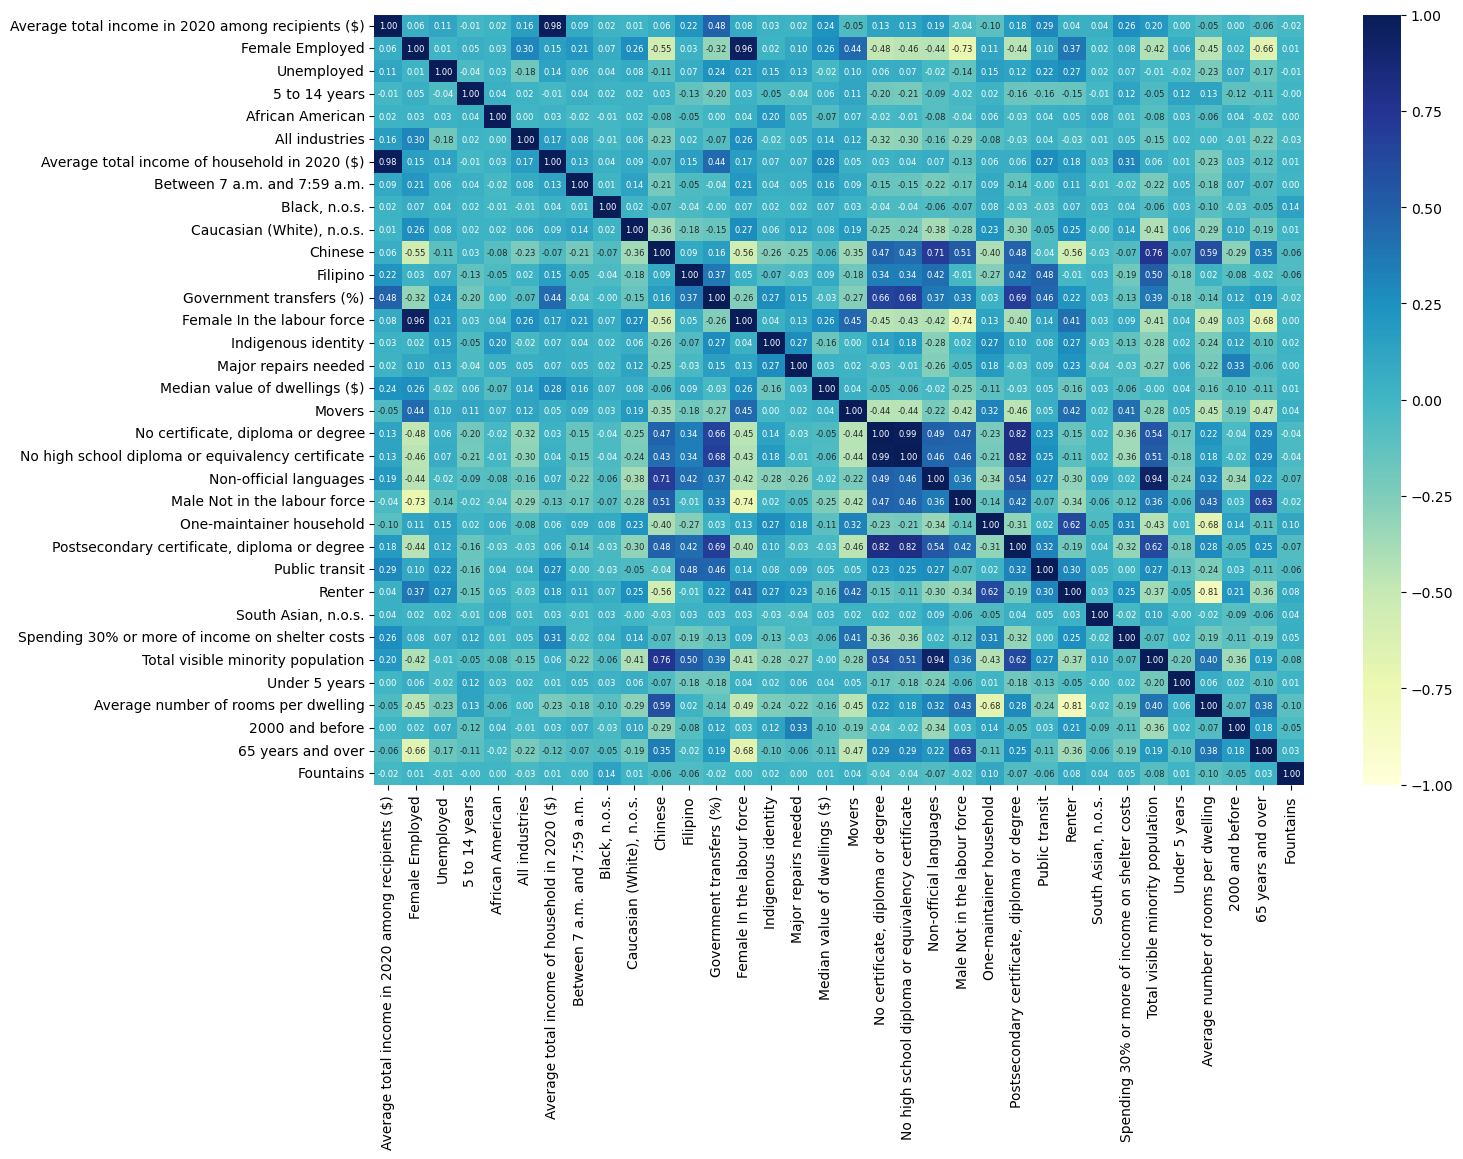

In [28]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', annot_kws={"fontsize": 6}, cmap='YlGnBu', vmin=-1, vmax=1)

# Dividing the correlation value higher than 0.9

In [29]:
def find_high_correlation(corr_matrix, threshold, variable_names):
    features = []
    Nvar = corr_matrix.shape[0]
    
    for i in range(Nvar):
        for j in range(i + 1, Nvar):
            if abs(corr_matrix[i, j]) > threshold:
                var1 = variable_names[i]
                var2 = variable_names[j]
                features.append((var1, var2, corr_matrix[i, j]))
    
    return features

corr_features = find_high_correlation(corr_matrix.values, 0.9, variable_names)
corr_features

[('Average total income in 2020 among recipients ($)',
  'Average total income of household in 2020 ($)',
  0.98),
 ('Female Employed', 'Female In the labour force', 0.96),
 ('No certificate, diploma or degree',
  'No high school diploma or equivalency certificate',
  0.99),
 ('Non-official languages', 'Total visible minority population', 0.94)]

# Dropping some variables after correlation matrix

In [30]:
 variables_to_drop = ['  Average total income in 2020 among recipients ($)', '  Female In the labour force', '  South Asian, n.o.s.',
                     '  No high school diploma or equivalency certificate', '  Non-official languages']

# Removing spaces and convert to lowercase
variables_to_drop = [column.strip().lower() for column in variables_to_drop]
merged_df.columns = merged_df.columns.str.strip().str.lower()
merged_df_dropped = merged_df.drop(variables_to_drop, axis=1)
merged_df_dropped

female employed  unemployed  5 to 14 years  african american  \
0                61.8         6.8           23.7               0.0   
1                68.1         4.3           21.9               0.0   
2                70.0         3.6            9.5               0.0   
3                74.6         8.4           17.9               0.0   
4                52.6        10.8           19.4               0.0   
...               ...         ...            ...               ...   
1018             63.4         4.4           19.0               0.0   
1019             73.8         4.7           18.2               0.0   
1020             45.2         7.1           15.9               0.0   
1021             43.1         7.9           13.4               0.0   
1022             55.6         7.5            8.9               0.0   

      all industries  average total income of household in 2020 ($)  \
0               96.3                                           89.5   
1              100.0                                           89.7   
2               96.1                                           91.3   
3               99.1                                           94.5   
4               96.2                                           91.3   
...              ...                                            ...   
1018           100.0                                           86.6   
1019            99.2                                           90.9   
1020            98.6                                           91.2   
1021            97.3                                           92.0   
1022            96.0                                           91.0   

      between 7 a.m. and 7:59 a.m.  black, n.o.s.  caucasian (white), n.o.s.  \
0                             23.1            0.0                        0.0   
1                             17.1            0.0                        0.0   
2                             18.2            0.0                        1.6   
3                             23.6            0.0                        2.0   
4                             20.0            0.0                        0.0   
...                            ...            ...                        ...   
1018                          20.6            0.0                        3.8   
1019                          23.2            0.0                        0.0   
1020                          21.2            0.0                        0.0   
1021                          30.4            0.0                        0.0   
1022                          29.7            0.0                        0.0   

      chinese  ...  postsecondary certificate, diploma or degree  \
0        12.7  ...                                          39.8   
1        21.8  ...                                          35.1   
2        21.9  ...                                          41.3   
3        15.3  ...                                          37.4   
4        40.4  ...                                          50.6   
...       ...  ...                                           ...   
1018      9.0  ...                                          12.8   
1019      9.2  ...                                          17.5   
1020     22.4  ...                                          50.9   
1021     50.3  ...                                          46.8   
1022     45.7  ...                                          55.5   

      public transit  renter  spending 30% or more of income on shelter costs  \
0               11.5    27.8                                             22.6   
1               14.6    29.5                                             26.7   
2               29.5    38.5                                             23.1   
3               38.9    78.5                                             44.3   
4               17.1    44.4                                             30.6   
...              ...     ...                    

In [31]:
merged_df_dropped.to_csv('Final_version.csv')
df1 = pd.read_csv('Final_version.csv')
df1.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Standard Scaling

In [32]:
def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df


scaled_df = standardScaler(df1)
scaled_df = np.around(scaled_df, 2)
display(scaled_df)
column_means = np.mean(scaled_df, axis=0)
column_means[np.abs(column_means) < 1e-2] = 0
display(column_means)


female employed  unemployed  5 to 14 years  african american  \
0                0.33        0.27           1.46              -0.1   
1                0.85       -0.62           1.17              -0.1   
2                1.00       -0.87          -0.83              -0.1   
3                1.38        0.85           0.52              -0.1   
4               -0.42        1.71           0.77              -0.1   
...               ...         ...            ...               ...   
1018             0.46       -0.59           0.70              -0.1   
1019             1.31       -0.48           0.57              -0.1   
1020            -1.02        0.38           0.20              -0.1   
1021            -1.19        0.67          -0.20              -0.1   
1022            -0.17        0.52          -0.93              -0.1   

      all industries  average total income of household in 2020 ($)  \
0              -0.38                                           0.03   
1               0.60                                           0.04   
2              -0.44                                           0.17   
3               0.36                                           0.43   
4              -0.41                                           0.17   
...              ...                                            ...   
1018            0.60                                          -0.21   
1019            0.39                                           0.14   
1020            0.23                                           0.16   
1021           -0.12                                           0.23   
1022           -0.46                                           0.15   

      between 7 a.m. and 7:59 a.m.  black, n.o.s.  caucasian (white), n.o.s.  \
0                             0.20          -0.09                      -0.63   
1                            -0.59          -0.09                      -0.63   
2                            -0.45          -0.09                       0.18   
3                             0.27          -0.09                       0.38   
4                            -0.21          -0.09                      -0.63   
...                            ...            ...                        ...   
1018                         -0.13          -0.09                       1.29   
1019                          0.22          -0.09                      -0.63   
1020                         -0.05          -0.09                      -0.63   
1021                          1.18          -0.09                      -0.63   
1022                          1.08          -0.09                      -0.63   

      chinese  ...  postsecondary certificate, diploma or degree  \
0       -0.73  ...                                          0.36   
1       -0.18  ...                                          0.00   
2       -0.18  ...                                          0.48   
3       -0.57  ...                                          0.18   
4        0.93  ...                                          1.19   
...       ...  ...                                           ...   
1018    -0.95  ...                                         -1.71   
1019    -0.94  ...                                         -1.35   
1020    -0.15  ...                                          1.21   
1021     1.52  ...                                          0.90   
1022     1.24  ...                                          1.57   

      public transit  renter  spending 30% or more of income on shelter costs  \
0              -0.99   -1.02                                            -0.82   
1              -0.70   -0.95                                            -0.43   
2               0.72   -0.53                                            -0.77   
3               1.61    1.33                                             1.25   
4              -0.46   -0.25                                            -0.06   
...              ...     ...                    

female employed                                    0.0
unemployed                                         0.0
5 to 14 years                                      0.0
african american                                   0.0
all industries                                     0.0
average total income of household in 2020 ($)      0.0
between 7 a.m. and 7:59 a.m.                       0.0
black, n.o.s.                                      0.0
caucasian (white), n.o.s.                          0.0
chinese                                            0.0
filipino                                           0.0
government transfers (%)                           0.0
indigenous identity                                0.0
major repairs needed                               0.0
median value of dwellings ($)                      0.0
movers                                             0.0
no certificate, diploma or degree                  0.0
male not in the labour force                       0.0
one-mainta

# Computing Covariance Matrix

In [33]:
def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance


cov_mat = computeCovarianceMatrix(scaled_df)
cov_mat = np.around(cov_mat, 2)
cov_mat

female employed  unemployed  \
female employed                                             1.00        0.01   
unemployed                                                  0.01        1.00   
5 to 14 years                                               0.05       -0.04   
african american                                            0.03        0.03   
all industries                                              0.30       -0.18   
average total income of household in 2020 ($)               0.15        0.14   
between 7 a.m. and 7:59 a.m.                                0.21        0.06   
black, n.o.s.                                               0.07        0.04   
caucasian (white), n.o.s.                                   0.26        0.08   
chinese                                                    -0.55       -0.11   
filipino                                                    0.03        0.07   
government transfers (%)                                   -0.32        0.24   
indigenous identity                                         0.02        0.15   
major repairs needed                                        0.10        0.13   
median value of dwellings ($)                               0.26       -0.02   
movers                                                      0.44        0.10   
no certificate, diploma or degree                          -0.48        0.06   
male not in the labour force                               -0.73       -0.14   
one-maintainer household                                    0.11        0.16   
postsecondary certificate, diploma or degree               -0.44        0.12   
public transit                                              0.10        0.21   
renter                                                      0.37        0.27   
spending 30% or more of income on shelter costs             0.08        0.07   
total visible minority population                          -0.42       -0.01   
under 5 years                                               0.06       -0.02   
average number of rooms per dwelling                       -0.45       -0.23   
2000 and before                                             0.02        0.07   
65 years and over                                          -0.66       -0.17   
fountains                                                   0.01       -0.01   

                                                 5 to 14 years  \
female employed                                           0.05   
unemployed                                               -0.04   
5 to 14 years                                             1.00   
african american                                          0.04   
all industries                                            0.02   
average total income of household in 2020 ($)            -0.01   
between 7 a.m. and 7:59 a.m.                              0.04   
black, n.o.s.                                             0.02   
caucasian (white), n.o.s.                                 0.02   
chinese                                                   0.03   
filipino                                                 -0.13   
government transfers (%)                                 -0.20   
indigenous identity                                      -0.05   
major repairs needed                                     -0.04   
median value of dwellings ($)                             0.06   
movers                                                    0.11   
no certificate, diploma or degree                        -0.20   
male not in the labour force                             -0.02   
one-maintainer household                                  0.02   
postsecondary certificate, diploma or degree             -0.16   
public transit                                           -0.16   
renter                                                   -0.15   
spending 30% or more of income on shelter costs           0.12   
total visible minority population                        -0.05  

# Plotting the Covariance Matrix as Heatmap

<Axes: >

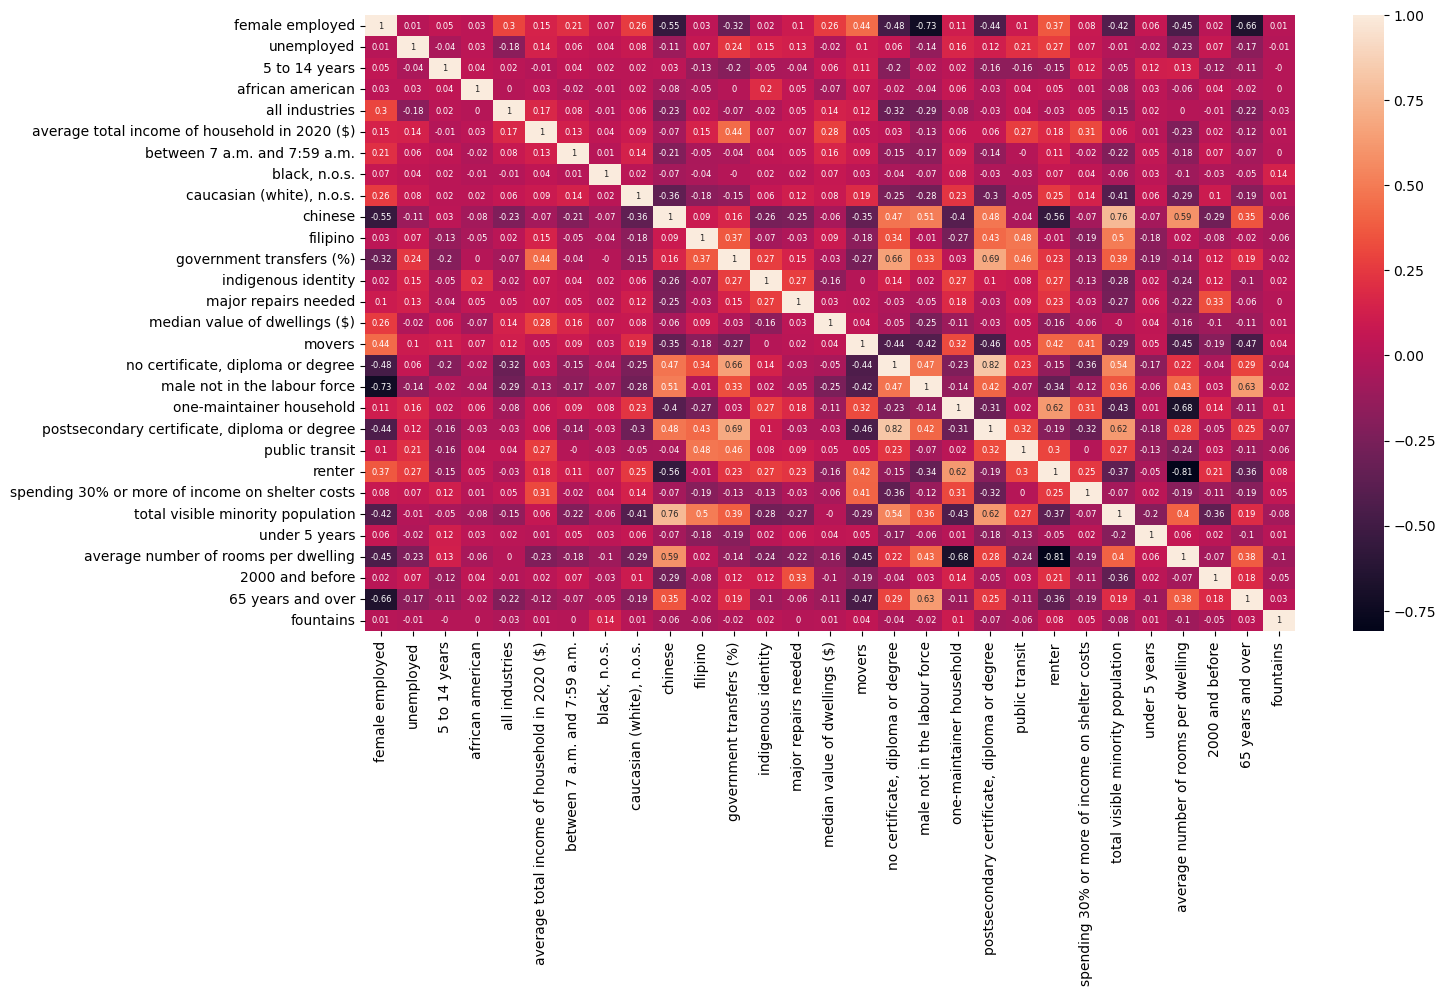

In [34]:
fig = plt.figure(figsize=(15, 8))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat.round(2), annot=True, fmt='g', annot_kws={"fontsize": 6})

# Eigen Decomposition of Covariance Matrix

In [35]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)
if np.any(np.isclose(eig_values, 0)):
    print("Zero eigenvalues found. Handle the condition accordingly.")

print('\nNumber of Eigenvectors : %s ' % len(eig_vectors))
print('\nEigenvectors : \n\n%s' % eig_vectors)
print('\nEigenvalues : \n\n%s' % eig_values)


# Visualize above eigenvectors as a dataframe (or coefficient matrix)
eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
display(eigenvec_df.T)


Number of Eigenvectors : 29 

Eigenvectors : 

[[ 2.93368352e-01 -1.68850264e-02 -2.76833581e-01  1.88753243e-01
  -1.39857114e-01 -1.46191286e-03  6.33454356e-02  1.62322209e-02
   2.50182361e-01 -3.84990487e-02 -9.04064194e-02  8.97628283e-03
   7.59853946e-01  2.82860867e-03 -1.75840481e-01  2.07471194e-02
   6.55832781e-02  7.06225906e-02  5.10613594e-02 -1.15700458e-01
   2.54661687e-01  5.36302623e-02  1.79211068e-02 -1.71470743e-02
   1.93395063e-02  3.50963917e-02  1.46027843e-02 -9.19795549e-03
  -3.08743555e-02]
 [ 4.91378685e-02 -2.35458745e-01  1.98559637e-02 -1.24646913e-01
  -1.08748809e-02  1.36488634e-01  1.36569849e-01 -4.77594149e-01
  -5.65148109e-02 -3.74173764e-02 -9.72764814e-02  3.51114524e-02
   1.37131495e-01 -1.60817747e-02 -1.09223136e-01  1.64766679e-02
   3.15249734e-02 -5.35514441e-02 -5.39224186e-02  1.33499632e-01
  -3.54563042e-01  2.00054605e-01  2.22275617e-01  3.02910547e-01
   2.22599703e-01 -4.74670019e-01 -2.69791980e-02 -7.73378721e-02
  -3.3220

0         1         2         3         4         5   \
eigvec_1   0.293368  0.049138  0.038409  0.035452  0.097115  0.048980   
eigvec_2  -0.016885 -0.235459  0.172906 -0.039967  0.040019 -0.236356   
eigvec_3  -0.276834  0.019856 -0.056443  0.083300 -0.229810 -0.200095   
eigvec_4   0.188753 -0.124647 -0.108897  0.002835  0.271183 -0.037722   
eigvec_5  -0.139857 -0.010875  0.209010 -0.082479  0.107516  0.552254   
eigvec_6  -0.001462  0.136489  0.399543  0.507524  0.108836  0.101253   
eigvec_7   0.063345  0.136570  0.105633  0.029268 -0.254035 -0.169716   
eigvec_8   0.016232 -0.477594 -0.132423  0.251368  0.482984  0.096228   
eigvec_9   0.250182 -0.056515 -0.054031  0.003316 -0.160850 -0.220860   
eigvec_10 -0.038499 -0.037417 -0.005734  0.015981 -0.056560 -0.156061   
eigvec_11 -0.090406 -0.097276 -0.022045 -0.011487 -0.226155  0.197003   
eigvec_12  0.008976  0.035111  0.057301 -0.033169  0.080002  0.001970   
eigvec_13  0.759854  0.137131  0.012323 -0.009636  0.026719 -0.010815   
eigvec_14  0.002829 -0.016082  0.090918 -0.002003  0.029435 -0.236396   
eigvec_15 -0.175840 -0.109223  0.076776 -0.053560 -0.081441  0.010939   
eigvec_16  0.020747  0.016477 -0.023581 -0.052651  0.080875  0.165358   
eigvec_17  0.065583  0.031525  0.064043  0.010982 -0.036903  0.343487   
eigvec_18  0.070623 -0.053551 -0.035088 -0.026310  0.003737 -0.112327   
eigvec_19  0.051061 -0.053922  0.027133 -0.121498 -0.089469 -0.034422   
eigvec_20 -0.115700  0.133500 -0.096769 -0.163402 -0.115813  0.106933   
eigvec_21  0.254662 -0.354563 -0.057484 -0.081845 -0.501237  0.346965   
eigvec_22  0.053630  0.200055  0.166851 -0.086782 -0.016701  0.235512   
eigvec_23  0.017921  0.222276 -0.023035 -0.350140  0.019541 -0.016835   
eigvec_24 -0.017147  0.302911 -0.398122  0.034816  0.052703  0.018842   
eigvec_25  0.019340  0.222600 -0.130810  0.675103 -0.282806  0.059383   
eigvec_26  0.035096 -0.474670  0.069592  0.100871 -0.247567 -0.077857   
eigvec_27  0.014603 -0.026979  0.260718 -0.061488 -0.120083 -0.026827   
eigvec_28 -0.009198 -0.077338 -0.437899  0.030641 -0.075976  0.083612   
eigvec_29 -0.030874 -0.033220 -0.461181  0.059690  0.033155  0.120648   

                 6         7         8         9   ...        19        20  \
eigvec_1   0.106804  0.042343  0.191390 -0.318520  ... -0.297501 -0.023426   
eigvec_2  -0.027106 -0.020233 -0.010023  0.099544  ... -0.262510 -0.360587   
eigvec_3  -0.029384 -0.002921  0.063773 -0.090635  ... -0.063751 -0.208556   
eigvec_4   0.188019 -0.057575  0.066502 -0.213539  ...  0.071603 -0.009159   
eigvec_5   0.266601  0.169319  0.131131  0.078631  ... -0.015924 -0.084459   
eigvec_6  -0.102660 -0.124000 -0.076516  0.067814  ...  0.092783  0.010771   
eigvec_7   0.073012  0.534124 -0.041226  0.010372  ...  0.079985 -0.148308   
eigvec_8  -0.296770  0.232593 -0.201729 -0.075544  ...  0.032427  0.018303   
eigvec_9   0.007405 -0.014234  0.045223 -0.312319  ...  0.023031 -0.049722   
eigvec_10 -0.013536 -0.000214 -0.029011  0.454920  ...  0.018779  0.013378   
eigvec_11 -0.011191 -0.012879  0.008587 -0.072793  ...  0.726080 -0.012090   
eigvec_12 -0.004373  0.004141 -0.003745 -0.065898  ... -0.045512  0.030205   
eigvec_13 -0.050089 -0.020231 -0.001269  0.167558  ...  0.218474 -0.048871   
eigvec_14 -0.004007 -0.012137  0.039573  0.138736  ... -0.015632 -0.117795   
eigvec_15  0.000262 -0.007728 -0.060944 -0.092717  ...  0.144353  0.041398   
eigvec_16 -0.025356  0.031244  0.130986  0.482329  ... -0.158057 -0.156961   
eigvec_17 -0.072947  0.002606 -0.035985  0.030750  ... -0.213120  0.166078   
eigvec_18  0.049312 -0.013919  0.007666  0.341780  ... -0.020426  0.472322   
eigvec_19 -0.048255  0.052473  0.021857  0.014083  ...  0.004495  0.497346   
eigvec_20 -0.079686  0.034503 -0.001958 -0.213565  ... -0.285530  0.228808   
eigvec_21  0.091036  0.011265 -0.074581  0.071973  ... -0.159645 -0.193145   
eigvec_22 -0.346231 -0.129769 -0.365977 -0.163122  ... -0.027585 -0.165671   
eigvec_23 -0.480684  0.336538 -0

# Sorting the eigenvalues in descending order

In [36]:
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]), 2),
                     eig_vectors[:, i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("\nTotal Variance (sum of all eigenvalues) : ",
      round(sum(sorted_eigenValues), 0))



Sorted Eigen-pairs (descending order) :

eigenvec_1 : 6.09
eigenvec_2 : 3.38
eigenvec_3 : 2.39
eigenvec_4 : 1.76
eigenvec_5 : 1.35
eigenvec_6 : 1.22
eigenvec_7 : 1.19
eigenvec_8 : 1.09
eigenvec_9 : 0.97
eigenvec_10 : 0.9
eigenvec_11 : 0.86
eigenvec_12 : 0.85
eigenvec_13 : 0.83
eigenvec_14 : 0.81
eigenvec_15 : 0.75
eigenvec_16 : 0.68
eigenvec_17 : 0.61
eigenvec_18 : 0.55
eigenvec_19 : 0.48
eigenvec_20 : 0.42
eigenvec_21 : 0.38
eigenvec_22 : 0.31
eigenvec_23 : 0.27
eigenvec_24 : 0.22
eigenvec_25 : 0.21
eigenvec_26 : 0.13
eigenvec_27 : 0.1
eigenvec_28 : 0.1
eigenvec_29 : 0.09

Total Variance (sum of all eigenvalues) :  29.0


# Decide the value of "K"

# Method-1 : Kaiser’s Stopping Rule

In [37]:
# Choosing all PCs which Eigenvalues are larger than 1
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(
    0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(
    str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 8
Their Eigenvalues are : [6.09, 3.38, 2.39, 1.76, 1.35, 1.22, 1.19, 1.09]


# Method-2 : Scree Plot

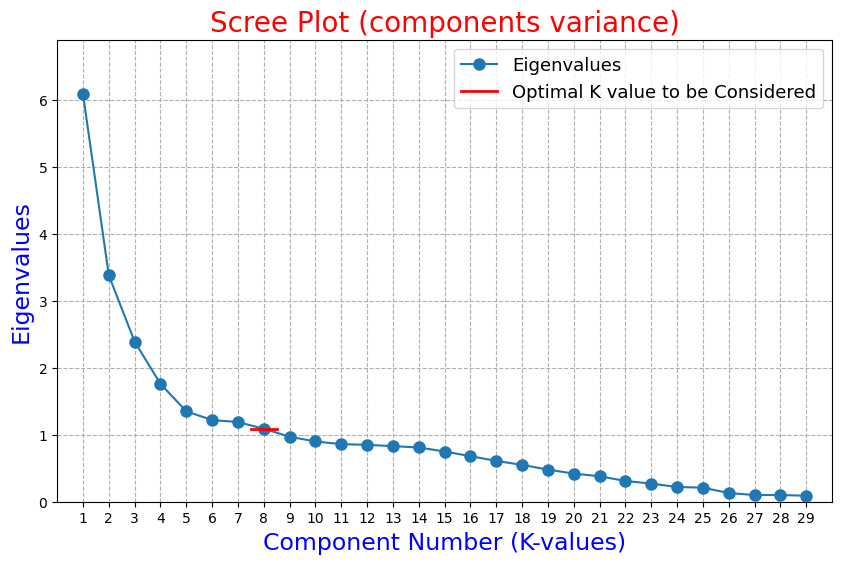

In [38]:
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(0, 6.9)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, len(sorted_eigenValues) + 1), sorted_eigenValues, linestyle='-',
         label="Eigenvalues", marker='o', markersize=8)
plt.plot([7.5, 8.5], [1.09, 1.09], color='red', linestyle='-',
         lw=2, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})
#plt.show()

# Method-3 : Cumulative Variance Plot


Cumulative Variance Percentage : 
Component 1: 21.01%
Component 2: 32.67%
Component 3: 40.91%
Component 4: 46.98%
Component 5: 51.64%
Component 6: 55.85%
Component 7: 59.95%
Component 8: 63.71%
Component 9: 67.06%
Component 10: 70.16%
Component 11: 73.13%
Component 12: 76.06%
Component 13: 78.92%
Component 14: 81.72%
Component 15: 84.3%
Component 16: 86.65%
Component 17: 88.75%
Component 18: 90.65%
Component 19: 92.31%
Component 20: 93.76%
Component 21: 95.07%
Component 22: 96.14%
Component 23: 97.07%
Component 24: 97.83%
Component 25: 98.55%
Component 26: 99.0%
Component 27: 99.34%
Component 28: 99.69%
Component 29: 100.0%


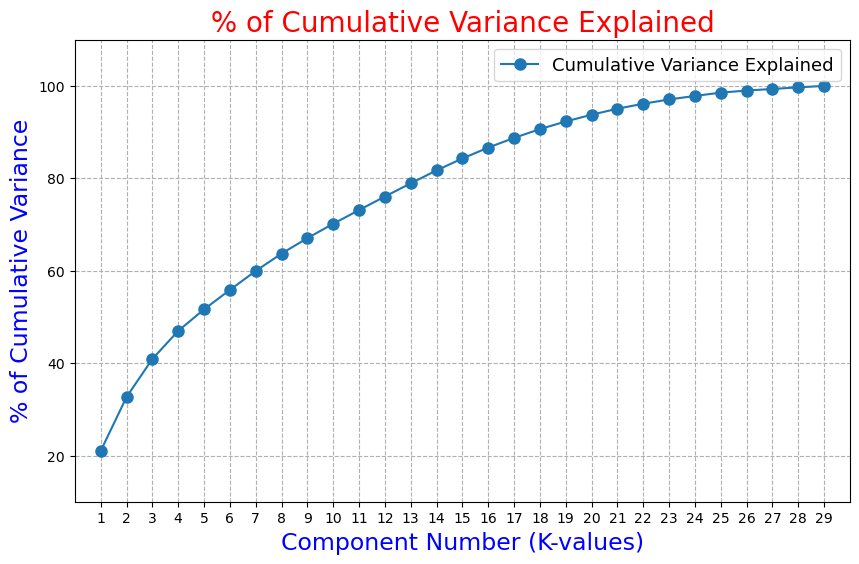

In [39]:
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 2)

print("\nCumulative Variance Percentage : ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))

fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(10, 110)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 30), sorted(list(cumulative_variance.values())[:30]), linestyle='-',
         label="Cumulative Variance Explained", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})
#plt.show()

# Projection matrix construction (K=8 from method- 1&2)

In [40]:
K = 8
projection_matrix = np.array(
    [list(np.hstack(i[1].reshape(29, 1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
display(projection_matrix)


Projection-Matrix Dimension ...  (8, 29)


array([[ 0.29336835,  0.04913787,  0.03840893,  0.03545241,  0.09711507,
         0.04897975,  0.10680374,  0.04234288,  0.19138978, -0.31851977,
        -0.13021851, -0.164613  ,  0.06190825,  0.08985704,  0.04756629,
         0.25931352, -0.29190507, -0.28397638,  0.2197223 , -0.29750124,
        -0.02342648,  0.24798299,  0.14143462, -0.30837775,  0.06424806,
        -0.27776871,  0.05301077, -0.23463408,  0.03575393],
       [-0.01688503, -0.23545874,  0.17290597, -0.03996714,  0.04001878,
        -0.23635593, -0.02710595, -0.02023278, -0.01002278,  0.09954384,
        -0.2451939 , -0.4383605 , -0.2232271 , -0.16676845, -0.00301626,
         0.00953769, -0.2542504 ,  0.01157338, -0.15950979, -0.26250975,
        -0.36058667, -0.32281973,  0.0260347 , -0.07822646,  0.12705227,
         0.28838048, -0.10548185,  0.05949134,  0.00181094],
       [-0.27683358,  0.01985596, -0.05644304,  0.08330008, -0.22980997,
        -0.20009537, -0.0293845 , -0.0029214 ,  0.06377287, -0.09063465,
  

# Projection Matrix as Dataframe

In [41]:
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index(
    [pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])])

# Print the DataFrame
display(projection_matrix_df)
display(projection_matrix_df.T)

1         2         3         4         5         6         7  \
PC1  0.293368  0.049138  0.038409  0.035452  0.097115  0.048980  0.106804   
PC2 -0.016885 -0.235459  0.172906 -0.039967  0.040019 -0.236356 -0.027106   
PC3 -0.276834  0.019856 -0.056443  0.083300 -0.229810 -0.200095 -0.029384   
PC4  0.188753 -0.124647 -0.108897  0.002835  0.271183 -0.037722  0.188019   
PC5 -0.139857 -0.010875  0.209010 -0.082479  0.107516  0.552254  0.266601   
PC6 -0.001462  0.136489  0.399543  0.507524  0.108836  0.101253 -0.102660   
PC7  0.063345  0.136570  0.105633  0.029268 -0.254035 -0.169716  0.073012   
PC8  0.016232 -0.477594 -0.132423  0.251368  0.482984  0.096228 -0.296770   

            8         9        10  ...        20        21        22  \
PC1  0.042343  0.191390 -0.318520  ... -0.297501 -0.023426  0.247983   
PC2 -0.020233 -0.010023  0.099544  ... -0.262510 -0.360587 -0.322820   
PC3 -0.002921  0.063773 -0.090635  ... -0.063751 -0.208556  0.107617   
PC4 -0.057575  0.066502 -0.213539  ...  0.071603 -0.009159 -0.166957   
PC5  0.169319  0.131131  0.078631  ... -0.015924 -0.084459 -0.128725   
PC6 -0.124000 -0.076516  0.067814  ...  0.092783  0.010771 -0.102782   
PC7  0.534124 -0.041226  0.010372  ...  0.079985 -0.148308 -0.045608   
PC8  0.232593 -0.201729 -0.075544  ...  0.032427  0.018303  0.018482   

           23        24        25        26        27        28        29  
PC1  0.141435 -0.308378  0.064248 -0.277769  0.053011 -0.234634  0.035754  
PC2  0.026035 -0.078226  0.127052  0.288380 -0.105482  0.059491  0.001811  
PC3 -0.062507 -0.280018  0.051161 -0.027086  0.316592  0.301420  0.060083  
PC4 -0.476544 -0.208312  0.086021  0.122403  0.340689  0.030176 -0.121762  
PC5  0.285979 -0.037537  0.197341  0.020696  0.084315  0.219781  0.131376  
PC6  0.046551  0.011122  0.347042  0.163029 -0.121131 -0.237674 -0.222839  
PC7 -0.319366 -0.017565  0.155437 -0.087757 -0.267609 -0.126042  0.450669  
PC8  0.095390 -0.022789 -0.170917  0.012650 -0.030714  0.072532  0.402487  

[8 rows x 29 columns]

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1   0.293368 -0.016885 -0.276834  0.188753 -0.139857 -0.001462  0.063345   
2   0.049138 -0.235459  0.019856 -0.124647 -0.010875  0.136489  0.136570   
3   0.038409  0.172906 -0.056443 -0.108897  0.209010  0.399543  0.105633   
4   0.035452 -0.039967  0.083300  0.002835 -0.082479  0.507524  0.029268   
5   0.097115  0.040019 -0.229810  0.271183  0.107516  0.108836 -0.254035   
6   0.048980 -0.236356 -0.200095 -0.037722  0.552254  0.101253 -0.169716   
7   0.106804 -0.027106 -0.029384  0.188019  0.266601 -0.102660  0.073012   
8   0.042343 -0.020233 -0.002921 -0.057575  0.169319 -0.124000  0.534124   
9   0.191390 -0.010023  0.063773  0.066502  0.131131 -0.076516 -0.041226   
10 -0.318520  0.099544 -0.090635 -0.213539  0.078631  0.067814  0.010372   
11 -0.130219 -0.245194 -0.312728  0.116242 -0.173639 -0.086127 -0.028917   
12 -0.164613 -0.438361  0.028731 -0.010340  0.182477  0.048113 -0.033677   
13  0.061908 -0.223227  0.257082  0.112148 -0.086143  0.390578  0.191105   
14  0.089857 -0.166768  0.194240  0.247614  0.111798  0.147478 -0.048465   
15  0.047566 -0.003016 -0.299295  0.215873  0.385890 -0.131374  0.210107   
16  0.259314  0.009538 -0.137479 -0.299403 -0.108391  0.086514 -0.038802   
17 -0.291905 -0.254250  0.042005  0.015235 -0.043203  0.027967  0.175134   
18 -0.283976  0.011573  0.283301 -0.126482  0.146287  0.005920 -0.084510   
19  0.219722 -0.159510  0.272743 -0.274908  0.060647 -0.081716 -0.003184   
20 -0.297501 -0.262510 -0.063751  0.071603 -0.015924  0.092783  0.079985   
21 -0.023426 -0.360587 -0.208556 -0.009159 -0.084459  0.010771 -0.148308   
22  0.247983 -0.322820  0.107617 -0.166957 -0.128725 -0.102782 -0.045608   
23  0.141435  0.026035 -0.062507 -0.476544  0.285979  0.046551 -0.319366   
24 -0.308378 -0.078226 -0.280018 -0.208312 -0.037537  0.011122 -0.017565   
25  0.064248  0.127052  0.051161  0.086021  0.197341  0.347042  0.155437   
26 -0.277769  0.288380 -0.027086  0.122403  0.020696  0.163029 -0.087757   
27  0.053011 -0.105482  0.316592  0.340689  0.084315 -0.121131 -0.267609   
28 -0.234634  0.059491  0.301420  0.030176  0.219781 -0.237674 -0.126042   
29  0.035754  0.001811  0.060083 -0.121762  0.131376 -0.222839  0.450669   

         PC8  
1   0.016232  
2  -0.477594  
3  -0.132423  
4   0.251368  
5   0.482984  
6   0.096228  
7  -0.296770  
8   0.232593  
9  -0.201729  
10 -0.075544  
11  0.015156  
12  0.064958  
13  0.139680  
14  0.001650  
15 -0.136065  
16  0.003777  
17 -0.074725  
18  0.048548  
19  0.021473  
20  0.032427  
21  0.018303  
22  0.018482  
23  0.095390  
24 -0.022789  
25 -0.170917  
26  0.012650  
27 -0.030714  
28  0.072532  
29  0.402487

# Varimax rotation method ( for representing the adjusted correlations between variables and componaents. considering the value higher than 0.3 )

In [42]:
pca = PCA()
components = projection_matrix_df.T

rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(components)
rotated_loadings_df = pd.DataFrame(rotated_loadings, columns=[
                                   'PC{}'.format(i+1) for i in range(rotated_loadings.shape[1])])
rotated_loadings_df = rotated_loadings_df.where(
    rotated_loadings_df.abs() > 0.3, np.nan)
rotated_loadings_df = rotated_loadings_df.fillna(0)
display(rotated_loadings_df)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.000000  0.000000 -0.456563  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.496609  0.000000   
3   0.000000  0.000000  0.000000  0.000000 -0.433347  0.331213  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.447154  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.612037   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  -0.327453  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000 -0.310354  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000 -0.417602  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.322943  0.000000  0.000000  0.000000  0.000000  0.302532  0.000000   
13  0.374021  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.483360  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16  0.000000 -0.391614  0.000000  0.000000  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.443931  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000 -0.437500  0.000000  0.000000  0.000000   
19  0.000000 -0.412164  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000 -0.447334  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23 -0.385892  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.000000  0.461690  0.000000   
25  0.000000  0.000000  0.000000  0.400520  0.000000  0.000000  0.000000   
26  0.470022  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27  0.000000  0.000000  0.459736  0.000000  0.000000  0.000000  0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.654671   

         PC8  
0   0.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.483227  
5   0.600992  
6   0.000000  
7   0.000000  
8   0.000000  
9   0.000000  
10  0.000000  
11  0.000000  
12  0.000000  
13  0.000000  
14  0.000000  
15  0.000000  
16  0.000000  
17  0.000000  
18  0.000000  
19  0.000000  
20  0.000000  
21  0.000000  
22  0.446545  
23  0.000000  
24  0.000000  
25  0.000000  
26  0.000000  
27  0.000000  
28  0.000000

# Variance percentage of first thirteen components

In [43]:
cumulative_variance = {}
for i in range(0, 8):
    ith_explained_variance = sorted_eig_pairs[i][0] / sum(sorted_eigenValues)
    ith_variance_percentage = round(ith_explained_variance * 100, 2)
    cumulative_variance[str(i + 1)] = ith_variance_percentage

print("\nVariance Percentage for the First Thirteen Components: ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))


Variance Percentage for the First Thirteen Components: 
Component 1: 21.01%
Component 2: 11.66%
Component 3: 8.24%
Component 4: 6.07%
Component 5: 4.66%
Component 6: 4.21%
Component 7: 4.1%
Component 8: 3.76%


# Calculating W (weight) of each component (W=(proportion of variance for each component)/(Total variance explained))

In [44]:
summation_variance = 0
for i in range(0, 8):  # Iterate over the first thirteen components
    ith_explained_variance = sorted_eig_pairs[i][0]
    summation_variance += ith_explained_variance

W = {}
for i in range(0, 8):
    ith_explained_variance = sorted_eig_pairs[i][0]
    ith_variance_percentage = ith_explained_variance / summation_variance
    W[str(i+1)] = ith_variance_percentage

data = []
for component, w in W.items():
    data.append(w)

df2 = pd.DataFrame(data, columns=['Value'])
df2 = pd.DataFrame(data)
print(df2)

          0
0  0.329724
1  0.182999
2  0.129399
3  0.095290
4  0.073091
5  0.066053
6  0.064429
7  0.059015


# Result (sigma (Wi*PCi) )

In [45]:
result = np.nan_to_num(rotated_loadings_df) @ np.nan_to_num(df2)
result_df = pd.DataFrame(result, columns=['Result'])
display(result_df)

Result
0  -0.059079
1   0.000000
2   0.032803
3  -0.009796
4   0.028517
5   0.035467
6   0.032683
7   0.039433
8   0.000000
9  -0.107969
10 -0.056795
11 -0.076421
12  0.126465
13  0.123324
14  0.035330
15  0.000000
16 -0.071665
17  0.057444
18 -0.041689
19 -0.075426
20  0.000000
21 -0.042626
22  0.026353
23 -0.127238
24  0.030496
25  0.038165
26  0.154977
27  0.059489
28  0.042180

# SoVI matrix (original data*Result)

In [46]:
SoVI = np.matmul(scaled_df.to_numpy(), result_df.to_numpy())
SoVI_df = pd.DataFrame(SoVI)
SoVI_df.columns = ['SVI']
display(SoVI_df)
# step-14 : Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_data = scaler.fit_transform(SoVI_df)
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = ['SVI']
df_scaled

SVI
0     0.356093
1     0.524075
2    -0.221746
3    -0.166751
4    -0.010463
...        ...
1018  0.823365
1019  0.678761
1020 -0.231038
1021 -0.505251
1022 -0.626400

[1023 rows x 1 columns]

SVI
0     47.073225
1     51.244573
2     32.724239
3     34.089883
4     37.970850
...         ...
1018  58.676588
1019  55.085764
1020  32.493494
1021  25.684189
1022  22.675793

[1023 rows x 1 columns]

In [47]:
df_scaled.to_csv('SVI_8.csv')

# Adding Geo_Name column

In [48]:
# Read the source and target CSV files into DataFrames

source_df = pd.read_csv('pivot_df.csv')
target_df = pd.read_csv('SVI_8.csv')

# Extract the column we want to add from the source DataFrame
column_to_add = source_df['GEO_NAME']

insert_index = 0

# Insert the extracted column as a new column in the target DataFrame
target_df.insert(insert_index, 'GEO_NAME', column_to_add)

target_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Set the data type for the first column as text
target_df['GEO_NAME'] = target_df['GEO_NAME'].astype(str)


# Save the modified target DataFrame to a new CSV file
target_df.to_csv('SVI_8PC.csv', index=False)

#  SVI mapping

In [64]:
with open('GeoJSON_SVI_8PC.geojson') as f:
    data = geojson.load(f)
    
records = []
for record in data['features']:
  records.append(record['properties'])
df = pd.DataFrame(records)
df

fid     DAUID              DGUID  LANDAREA PRUID         lon  \
0        1.0  59150307  2021S051259150307    0.2991    59 -123.025980   
1        2.0  59150308  2021S051259150308    0.1096    59 -123.025839   
2        3.0  59150309  2021S051259150309    0.1119    59 -123.029587   
3        4.0  59150310  2021S051259150310    0.1094    59 -123.025860   
4        5.0  59150311  2021S051259150311    0.0809    59 -123.028832   
...      ...       ...                ...       ...   ...         ...   
1020  1021.0  59154192  2021S051259154192    0.0641    59 -123.128923   
1021  1022.0  59154193  2021S051259154193    0.0847    59 -123.124411   
1022  1023.0  59154194  2021S051259154194    0.0973    59 -123.047445   
1023  1024.0  59154195  2021S051259154195    0.1240    59 -123.045426   
1024  1025.0  59154196  2021S051259154196    0.1436    59 -123.055625   

            lat  GEO_NAME        SVI  
0     49.288743  59150307  47.073225  
1     49.284312  59150308  51.244573  
2     49.282958  59150309  32.724239  
3     49.281583  59150310  34.089883  
4     49.279066  59150311  37.970850  
...         ...       ...        ...  
1020  49.265200  59154192  58.676588  
1021  49.264500  59154193  55.085764  
1022  49.234941  59154194  32.493494  
1023  49.231413  59154195  25.684189  
1024  49.234564  59154196  22.675793  

[1025 rows x 9 columns]

In [79]:
# Create a FeatureCollection object
with open('GeoJSON_SVI_8PC.geojson') as f:
    data = geojson.load(f)

feature_collection = geojson.feature.FeatureCollection(data['features'])

In [80]:
# Creating the dataframe of the data containing the GEO andm and the Metric
records = []
for record in feature_collection['features']:

  record_info = {}
  record_info['fips'] = record['properties']['GEO_NAME']
  record_info['SVI'] = record['properties']['SVI']
  record['id'] = record['properties']['GEO_NAME']
  record['geometry']['type'] = 'Polygon'
  record['geometry']['coordinates']  = record['geometry']['coordinates'][0]
  records.append(record_info)

Geo_data_df = pd.DataFrame(records)
Geo_data_df

fips        SVI
0     59150307  47.073225
1     59150308  51.244573
2     59150309  32.724239
3     59150310  34.089883
4     59150311  37.970850
...        ...        ...
1020  59154192  58.676588
1021  59154193  55.085764
1022  59154194  32.493494
1023  59154195  25.684189
1024  59154196  22.675793

[1025 rows x 2 columns]

In [81]:
import plotly.express as px

# Token
access_token = "pk.eyJ1IjoiYXJtaXNpbmFlaSIsImEiOiJjbGlpeXBhcWQwMnFhM21waDM4MWtzdXR6In0.ABSEkduUBc8wsJVvf7MIJA"
px.set_mapbox_access_token(access_token)

fig = px.choropleth_mapbox(Geo_data_df, geojson = feature_collection, locations='fips', color='SVI',
                           color_continuous_scale="Viridis",
                           range_color=(0, 100),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 49.2827, "lon": -123.1207},
                           opacity=0.5,
                           labels={'SVI':'SVI rate'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Environmental Vulnerability Index

In [351]:
df = pd.read_csv('parks_coast_area.csv', encoding='latin-1', low_memory=False)
df

fid     DAUID              DGUID  LANDAREA  PRUID  park_id_su  \
0        1  59150307  2021S051259150307    0.2991     59          66   
1        2  59150308  2021S051259150308    0.1096     59           0   
2        3  59150309  2021S051259150309    0.1119     59           0   
3        4  59150310  2021S051259150310    0.1094     59           0   
4        5  59150311  2021S051259150311    0.0809     59           0   
...    ...       ...                ...       ...    ...         ...   
1020  1021  59154192  2021S051259154192    0.0641     59         224   
1021  1022  59154193  2021S051259154193    0.0847     59         312   
1022  1023  59154194  2021S051259154194    0.0973     59         152   
1023  1024  59154195  2021S051259154195    0.1240     59           0   
1024  1025  59154196  2021S051259154196    0.1436     59           0   

             lon        lat   area_sum  area_coast  
0    -123.025980  49.288743   3464.191    7065.807  
1    -123.025839  49.284312      0.000       0.000  
2    -123.029587  49.282958      0.000       0.000  
3    -123.025860  49.281583      0.000       0.000  
4    -123.028832  49.279066      0.000       0.000  
...          ...        ...        ...         ...  
1020 -123.128923  49.265200    673.900       0.000  
1021 -123.124411  49.264500   2255.176       0.000  
1022 -123.047445  49.234941  15884.013       0.000  
1023 -123.045426  49.231413      0.000       0.000  
1024 -123.055625  49.234564      0.000       0.000  

[1025 rows x 10 columns]

In [354]:
selected_columns = ['DAUID', 'area_sum', 'area_coast']
subset_df = df[selected_columns]
subset_df

DAUID   area_sum  area_coast
0     59150307   3464.191    7065.807
1     59150308      0.000       0.000
2     59150309      0.000       0.000
3     59150310      0.000       0.000
4     59150311      0.000       0.000
...        ...        ...         ...
1020  59154192    673.900       0.000
1021  59154193   2255.176       0.000
1022  59154194  15884.013       0.000
1023  59154195      0.000       0.000
1024  59154196      0.000       0.000

[1025 rows x 3 columns]

# Scaling the value of parks and coastline 

In [444]:
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_data = scaler.fit_transform(subset_df)
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = ['area_sum','area_coast']
df_scaled 

area_sum  area_coast
0     0.080874    3.680641
1     0.000000    0.000000
2     0.000000    0.000000
3     0.000000    0.000000
4     0.000000    0.000000
...        ...         ...
1020  0.015733    0.000000
1021  0.052649    0.000000
1022  0.370825    0.000000
1023  0.000000    0.000000
1024  0.000000    0.000000

[1025 rows x 2 columns]

# Calculating Environmental Vulnerability Index (EVI)

In [445]:
df_scaled['EVI'] = df_scaled[['area_sum', 'area_coast']].sum(axis=1)
df_scaled.drop(['area_sum', 'area_coast'], axis=1, inplace=True)
df_scaled

EVI
0     3.761516
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
1020  0.015733
1021  0.052649
1022  0.370825
1023  0.000000
1024  0.000000

[1025 rows x 1 columns]

In [446]:
# Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_data = scaler.fit_transform(df_scaled)
EVI_scaled = pd.DataFrame(scaled_data)
EVI_scaled.columns = ['EVI']
EVI_scaled

EVI
0     2.362372
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
1020  0.009881
1021  0.033065
1022  0.232892
1023  0.000000
1024  0.000000

[1025 rows x 1 columns]

In [447]:
EVI_scaled.to_csv('EVI.csv')

In [442]:
source_df = pd.read_csv('parks_coast_area.csv')
target_df = pd.read_csv('EVI.csv')

# Extract the column we want to add from the source DataFrame
column_to_add = source_df['DAUID']

insert_index = 0

# Insert the extracted column as a new column in the target DataFrame
target_df.insert(insert_index, 'DAUID', column_to_add)

target_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Save the modified target DataFrame to a new CSV file
target_df.to_csv('EVI.csv', index=False)

# EVI Mapping

In [85]:
with open('Geojson_EVI.geojson') as f:
    data = geojson.load(f)
    
records = []
for record in data['features']:
  records.append(record['properties'])
df = pd.DataFrame(records)
df

fid     DAUID              DGUID  LANDAREA PRUID         lon  \
0        1.0  59150307  2021S051259150307    0.2991    59 -123.025980   
1        2.0  59150308  2021S051259150308    0.1096    59 -123.025839   
2        3.0  59150309  2021S051259150309    0.1119    59 -123.029587   
3        4.0  59150310  2021S051259150310    0.1094    59 -123.025860   
4        5.0  59150311  2021S051259150311    0.0809    59 -123.028832   
...      ...       ...                ...       ...   ...         ...   
1020  1021.0  59154192  2021S051259154192    0.0641    59 -123.128923   
1021  1022.0  59154193  2021S051259154193    0.0847    59 -123.124411   
1022  1023.0  59154194  2021S051259154194    0.0973    59 -123.047445   
1023  1024.0  59154195  2021S051259154195    0.1240    59 -123.045426   
1024  1025.0  59154196  2021S051259154196    0.1436    59 -123.055625   

            lat       EVI  
0     49.288743  2.362372  
1     49.284312  0.000000  
2     49.282958  0.000000  
3     49.281583  0.000000  
4     49.279066  0.000000  
...         ...       ...  
1020  49.265200  0.009881  
1021  49.264500  0.033065  
1022  49.234941  0.232892  
1023  49.231413  0.000000  
1024  49.234564  0.000000  

[1025 rows x 8 columns]

In [86]:
# Create a FeatureCollection object
with open('Geojson_EVI.geojson') as f:
    data = geojson.load(f)

feature_collection = geojson.feature.FeatureCollection(data['features'])

In [87]:
# Creating the dataframe of the data containing the GEO andm and the Metric
records = []
for record in feature_collection['features']:

  record_info = {}
  record_info['fips'] = record['properties']['DAUID']
  record_info['EVI'] = record['properties']['EVI']
  record['id'] = record['properties']['DAUID']
  record['geometry']['type'] = 'Polygon'
  record['geometry']['coordinates']  = record['geometry']['coordinates'][0]
  records.append(record_info)

Geo_data_df = pd.DataFrame(records)
Geo_data_df

fips       EVI
0     59150307  2.362372
1     59150308  0.000000
2     59150309  0.000000
3     59150310  0.000000
4     59150311  0.000000
...        ...       ...
1020  59154192  0.009881
1021  59154193  0.033065
1022  59154194  0.232892
1023  59154195  0.000000
1024  59154196  0.000000

[1025 rows x 2 columns]

In [88]:
import plotly.express as px

# Token
access_token = "pk.eyJ1IjoiYXJtaXNpbmFlaSIsImEiOiJjbGlpeXBhcWQwMnFhM21waDM4MWtzdXR6In0.ABSEkduUBc8wsJVvf7MIJA"
px.set_mapbox_access_token(access_token)

fig = px.choropleth_mapbox(Geo_data_df, geojson = feature_collection, locations='fips', color='EVI',
                           color_continuous_scale="Viridis",
                           range_color=(0, 100),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 49.2827, "lon": -123.1207},
                           opacity=0.5,
                           labels={'EVI':'EVI rate'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Economic ( Cost Analysis)

In [93]:
# Reading the catalogue file
Catalogue_df = pd.read_excel('Cost_Analysis.xlsx')
Catalogue_df.drop(['Replacement length (m)'], axis = 1, inplace = True)

# Reading the data file
Data_df = pd.read_csv('Vancouver2020.csv')

In [94]:
# Distinguish the pipes that should be replaced
Replace_df = Data_df[Data_df['Break_Status'] == 1]

# Aggregate how much length we need for each specific diameter
Replace_length_df = Replace_df[['Diameter', 'Length']].groupby('Diameter').sum('Length').reset_index()
Replace_length_df.rename(columns = {'Length' : 'Replacement length (m)'}, inplace = True)
Replace_length_df

Diameter  Replacement length (m)
0       100               35.154574
1       150              337.864586
2       200               40.244333
3       300              109.177324
4       750               37.250672

In [95]:
# Merging to two dataframes based on the size of the diameter
Length_required_df = pd.merge(Catalogue_df, Replace_length_df, left_on = 'Diameter (mm)' ,
                   right_on='Diameter', how = 'left')

# Fill up the null values for the replacement length
Length_required_df['Replacement length (m)'] = Length_required_df['Replacement length (m)'].fillna(0)

# Drop the repeated column
Length_required_df.drop('Diameter', axis = 1, inplace = True)
Length_required_df

Diameter (mm) Material    Cost / m  Replacement length (m)
0            100      PVC   32.095440               35.154574
1            150      PVC   39.995856              337.864586
2            200      PVC   52.169568               40.244333
3            250      PVC   78.440280                0.000000
4            300      PVC   83.243928              109.177324
5            350      PVC  123.285504                0.000000
6            400      PVC  163.107624                0.000000
7            450      PVC  194.776344                0.000000
8            500      PVC  232.199688                0.000000
9            600      PVC  272.128488                0.000000

In [96]:
# Computing the cost for each specific pipe
Length_required_df['Total_replacement_cost'] = Length_required_df['Cost / m'] * Length_required_df['Replacement length (m)']
Length_required_df

Diameter (mm) Material    Cost / m  Replacement length (m)  \
0            100      PVC   32.095440               35.154574   
1            150      PVC   39.995856              337.864586   
2            200      PVC   52.169568               40.244333   
3            250      PVC   78.440280                0.000000   
4            300      PVC   83.243928              109.177324   
5            350      PVC  123.285504                0.000000   
6            400      PVC  163.107624                0.000000   
7            450      PVC  194.776344                0.000000   
8            500      PVC  232.199688                0.000000   
9            600      PVC  272.128488                0.000000   

   Total_replacement_cost  
0             1128.301511  
1            13513.183338  
2             2099.529452  
3                0.000000  
4             9088.349307  
5                0.000000  
6                0.000000  
7                0.000000  
8                0.000000  
9                0.000000

In [97]:
# Reporting the total cost for the replacement
print('The total cost to replace the pipes would be: ', Length_required_df['Total_replacement_cost'].sum())

The total cost to replace the pipes would be:  25829.36360785336
